In [1]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\ecommerce_furniture_dataset_2024.csv")

In [3]:
#check the dataset
df

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
...,...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping


In [4]:
#Check the first few rows of the dataset
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [5]:
#Finding null values
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [6]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [7]:
df.shape

(2000, 5)

Removing null values

In [8]:
df.drop(['originalPrice'],axis=1,inplace=True)

In [9]:
df

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping
...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,$228.18,0,Free shipping


finding Unique values

In [10]:
df['tagText'].nunique()

100

In [11]:
 df['tagText'].value_counts()

tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64

In [12]:
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

In [13]:
df['tagText'].isnull().sum()

0

In [14]:
df['tagText'].value_counts()

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64

In [15]:
df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


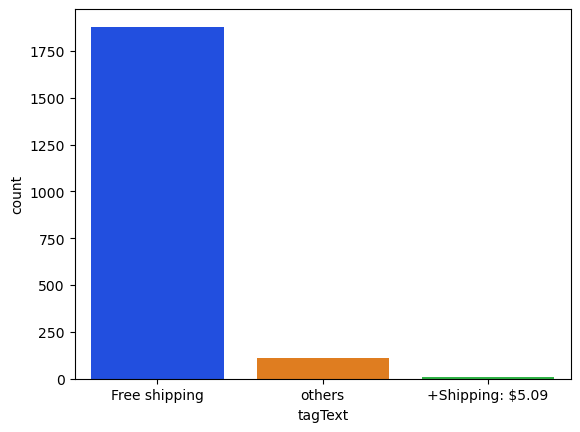

In [16]:
sns.countplot(x=df['tagText'], data = df, palette = 'bright' , hue = 'tagText', color='orange') 
plt.show() 

In [19]:
df['price'] = df['price'].replace('[/$,]', '',regex=True).astype(float)

In [20]:
df['price']

0        46.79
1       169.72
2        39.46
3       111.99
4        21.37
         ...  
1995     72.49
1996    276.65
1997    196.44
1998    228.18
1999     99.48
Name: price, Length: 2000, dtype: float64

In [21]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: price
Non-Null Count  Dtype  
--------------  -----  
2000 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


C:\Users\HP\AppData\Local\Temp\ipykernel_8048\1413676395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],  color = 'green')


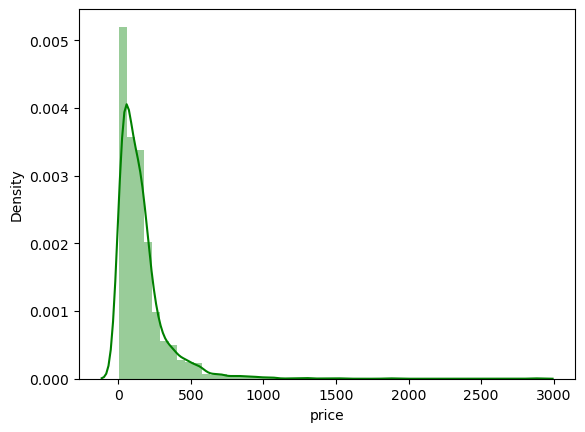

In [22]:
sns.distplot(df['price'],  color = 'green')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8048\4036631541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'], color = 'orange')


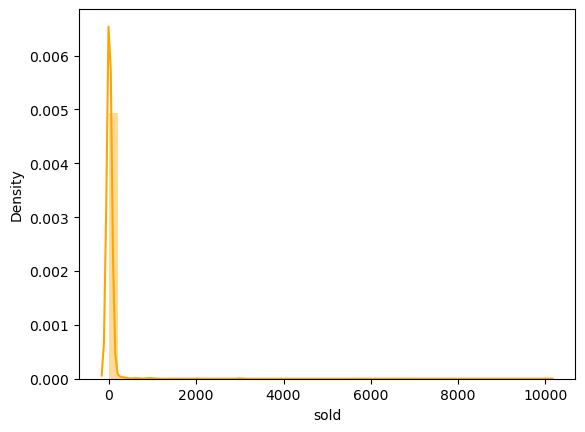

In [23]:
sns.distplot(df['sold'], color = 'orange')
plt.show()

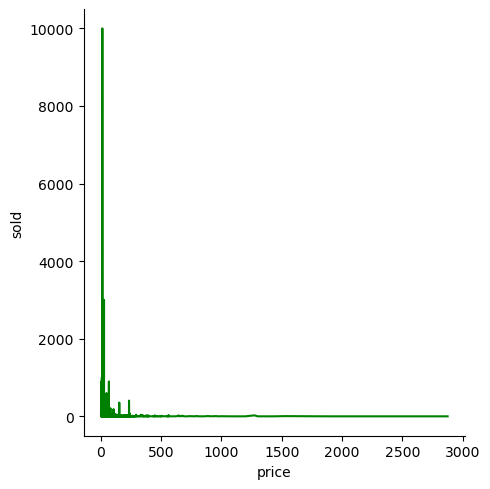

In [24]:
sns.relplot(x='price', y='sold', data=df, kind = 'line' , color = 'green')
plt.show()

Only free Shipping item

In [26]:
freship = df[df['tagText'] == 'Free shipping']

In [27]:
 freship['tagText'].value_counts()

tagText
Free shipping    1880
Name: count, dtype: int64

In [28]:
freship.head(5)

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


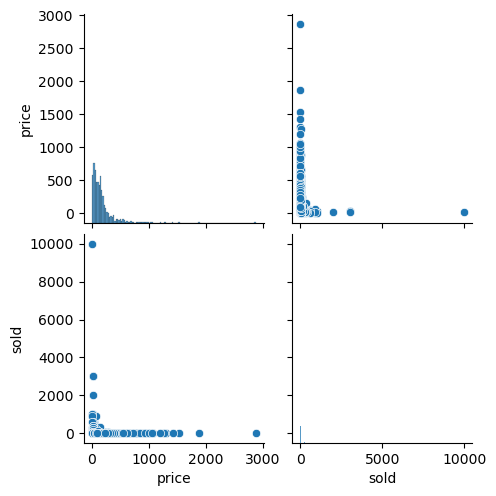

In [30]:
sns.pairplot(freship[['price', 'sold']], )
plt.show()

In [31]:
df['productTitle'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998    False
1999    False
Name: productTitle, Length: 2000, dtype: bool

In [32]:
uniquepro = df['productTitle'].unique()

In [33]:
uniquepro

array(['Dresser For Bedroom With 9 Fabric Drawers Wardrobe Steel Frame Assembly Closet For Clothes Storage Display Cabinet Of Furniture',
       'Outdoor Conversation Set 4 Pieces Patio Furniture, Wicker Patio Chair Sofa Set w/ Water-Resistant Dark-Brown Cushion & Tempered',
       'Desser For Bedroom With 7 Fabric Drawers Organizer Storage Closet Chest Clothes For Living Room Display Cabinet Of Furniture',
       ...,
       'Garden Furniture 4507 (Dark Grey) Steel Frame Textilence Seats Swing Glider Outdoor Patio Canopy Swing Chair 3-Person Redes Nіsi',
       'Furniture Acrylic Coffee Table Transparent Living Room TV Cabinet Sofa Side Table Storage Cabinet Leisure Balcony Tea Tables',
       'Bed Frane Bamboo and Metal Platform Bed Frame With Footboard / Wood Slat Support / No Box Spring Needed / Easy Assembly Queen'],
      dtype=object)

D:\an\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


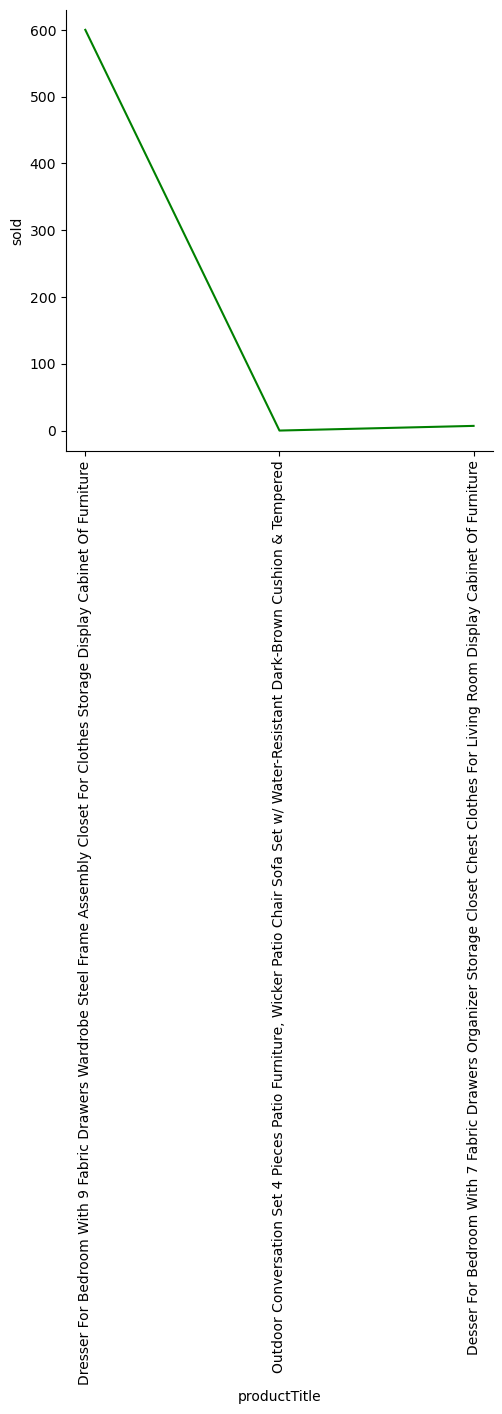

In [34]:
sns.relplot(x=df['productTitle'].head(3), y='sold', data=df, kind = 'line' , color = 'green')
plt.xticks(rotation=90)
plt.show()

MADE BY - SIMPY


Github :- https://github.com/Simpy1-hub/Simpy1-hub.git


linkedin :- www.linkedin.com/in/simpy-149a0a242